<a href="https://colab.research.google.com/github/Annyatoma/Intrusion-Detection-System/blob/main/Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn keras tensorflow

In [ ]:
import pandas as pd
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label']
df = pd.read_csv('/content/KDDTrain+.csv')
df = df.dropna()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns
encoder = LabelEncoder()
df['protocol_type'] = encoder.fit_transform(df['protocol_type'])
df['service'] = encoder.fit_transform(df['service'])
df['flag'] = encoder.fit_transform(df['flag'])


In [ ]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)
X = df.drop('label', axis=1)
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9680 - loss: 0.0934
Epoch 2/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9909 - loss: 0.0263
Epoch 3/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9924 - loss: 0.0214
Epoch 4/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9934 - loss: 0.0205
Epoch 5/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9942 - loss: 0.0176
Epoch 6/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9944 - loss: 0.0153
Epoch 7/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9945 - loss: 0.0158
Epoch 8/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9953 - loss: 0.0138
Epoch 9/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9957 - loss: 0.0127
Epoch 10/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9958 - loss: 0.0120


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



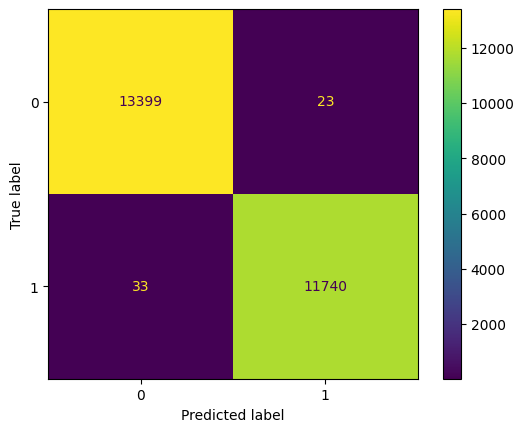

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9949 - loss: 0.0191
Test Accuracy: 0.9948005676269531


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import joblib
joblib.dump(clf, 'ids_dt_model.pkl')


['ids_dt_model.pkl']

In [ ]:
model.save('ids_ann_model.keras')  # ✅ Recommended modern format

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st

st.title("Intrusion Detection System")
st.write("This is a basic IDS using ML.")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.174.81:8501



In [ ]:
# app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load('ids_dt_model.pkl')

st.title("Intrusion Detection System")
input_data = st.text_input("Enter 41 comma-separated values")
if st.button("Predict"):
    input_array = np.array([float(x) for x in input_data.split(',')]).reshape(1, -1)
    result = model.predict(input_array)
    st.write("🔒 Normal Traffic" if result[0] == 0 else "⚠️ Intrusion Detected!")
